# **EJERCICIO 4 - MALL CUSTOMER SEGMENTATION**

#### *Carga librerias*

In [1]:
# Importación de librerías y configuración
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

---
## **EDA**

#### *Informacion basica*

In [10]:
# Carga de datos
df = pd.read_csv('Mall_Customers.csv')
# Información básica del dataset
print("\n1. INFORMACIÓN BÁSICA DEL DATASET")
print("="*40)
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de clientes: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

print("\nPrimeras 10 filas del dataset:")
display(df.head(10))

print("="*50)
print("INSPECCION INICIAL")
print("="*50)
# Data types and missing values
print("\nTipo de Data, data nula:")
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100,
    'Unique Values': df.nunique()
})
display(info_df)


1. INFORMACIÓN BÁSICA DEL DATASET
Dimensiones del dataset: (200, 5)
Número de clientes: 200
Número de variables: 5

Primeras 10 filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


INSPECCION INICIAL

Tipo de Data, data nula:


,Data Type,Missing Values,Missing %,Unique Values
CustomerID,int64,0,0.0,200
Gender,object,0,0.0,2
Age,int64,0,0.0,51
Annual Income (k$),int64,0,0.0,64
Spending Score (1-100),int64,0,0.0,84


### **Conclusiones del Análisis Exploratorio Inicial**
---
**Información General del Dataset**
El dataset contiene información de **200 clientes** y **5 variables** principales:
- `CustomerID`
- `Gender`
- `Age`
- `Annual Income (k$)`
- `Spending Score (1-100)`

**Calidad de los Datos**
- **No existen valores nulos** en ninguna columna, lo que indica que el dataset está **completo y listo para análisis** sin necesidad de limpieza adicional.  
- Los tipos de datos son correctos:
  - `CustomerID`: numérico y único por cliente.  
  - `Gender`: categórico (Male/Female).  
  - `Age`, `Annual Income (k$)` y `Spending Score (1-100)`: numéricos continuos, ideales para análisis estadístico o segmentación.

**Distribución Inicial de Datos**
- Se registran **200 clientes únicos**, lo que garantiza que no existen duplicados.  
- La cantidad de valores únicos refleja una buena **variedad en las características**:
  - `Age`: 51 valores únicos.  
  - `Annual Income (k$)`: 64 valores únicos.  
  - `Spending Score (1-100)`: 84 valores únicos.  
- Esta diversidad permite identificar **diferentes perfiles de clientes** para estudios más profundos.



#### *Analisis Estadistico*

RESUMEN ESTADISTICO
Resumen de columnas numéricas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


ANALISIS GRAFICO VARIABLES NUMERICAS


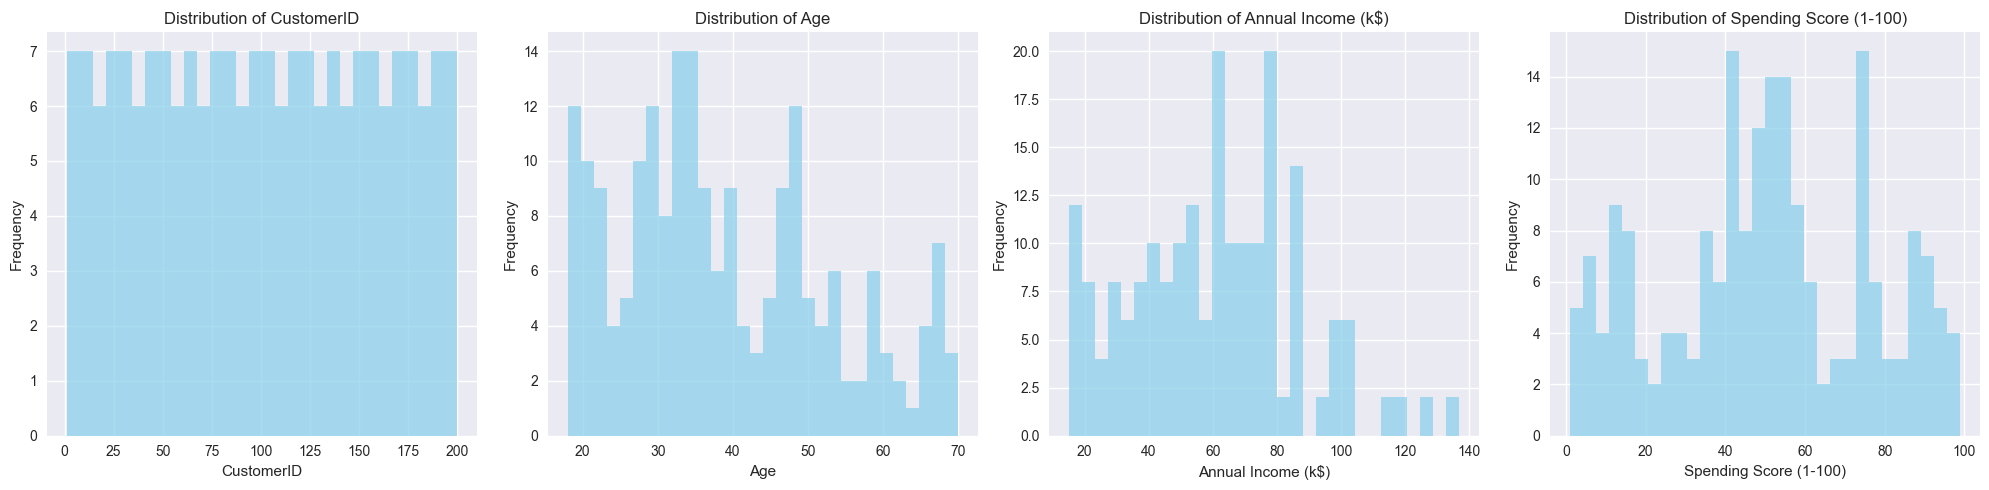

In [12]:
print("="*50)
print("RESUMEN ESTADISTICO")
print("="*50)

# Numerical columns summary - only include int64 and float64, exclude bool and category
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Resumen de columnas numéricas:")
display(df[numerical_cols].describe())


print("="*50)
print("ANALISIS GRAFICO VARIABLES NUMERICAS")
print("="*50)

numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col not in ['row_number', 'customer_id']]

# Distribution plots for numerical variables
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### **Conclusión del Análisis Estadístico y Distribución de Variables**
---
**Resumen Numérico**
Del análisis estadístico de las columnas numéricas se observan los siguientes puntos clave:

**Edad (`Age`)**
  - Rango: de 18 a 70 años, con una media de **38.85 años**.
  - Graficamente muestra una **tendencia ligeramente sesgada hacia la izquierda**, con mayor concentración en edades entre **25 y 40 años**.   
  - Indica una población mayoritariamente **adulta joven** con presencia de clientes de distintas generaciones.

**Ingresos Anuales (`Annual Income (k$)`)**
  - Rango: entre **15k y 137k** dólares, con una media de **60.56k**.  
  - Presenta **picos en rangos específicos** (entre 60k y 80k), lo que puede indicar grupos de ingresos medios predominantes.  
  - Existe una **amplia dispersión** (desviación estándar ≈ 26.26), lo que sugiere diferentes niveles socioeconómicos entre los clientes.

**Puntaje de Gasto (`Spending Score (1-100)`)**
  - Media: **50.2**, con valores que oscilan entre **1 y 99**.  
  - No sigue una distribución normal; se observan **múltiples concentraciones** de clientes con niveles de gasto tanto bajos como altos, sugiriendo la existencia de **segmentos de comportamiento diferenciados**.
  - Esto indica una **distribución bastante equilibrada** entre clientes con alto y bajo gasto.

**Conclusión**

El conjunto de datos evidencia una **diversidad significativa en edad, ingresos y comportamiento de gasto**.  
Estas características hacen que el dataset sea **ideal para aplicar técnicas de segmentación**, como **clustering**, con el fin de identificar distintos **perfiles de clientes** (por ejemplo, ahorradores, gastadores altos o de ingresos medios).  
Además, la ausencia de valores atípicos extremos facilita el modelado sin necesidad de una limpieza adicional.


#### *Analisis de relaciones*

ANALISIS DE RELACIONES


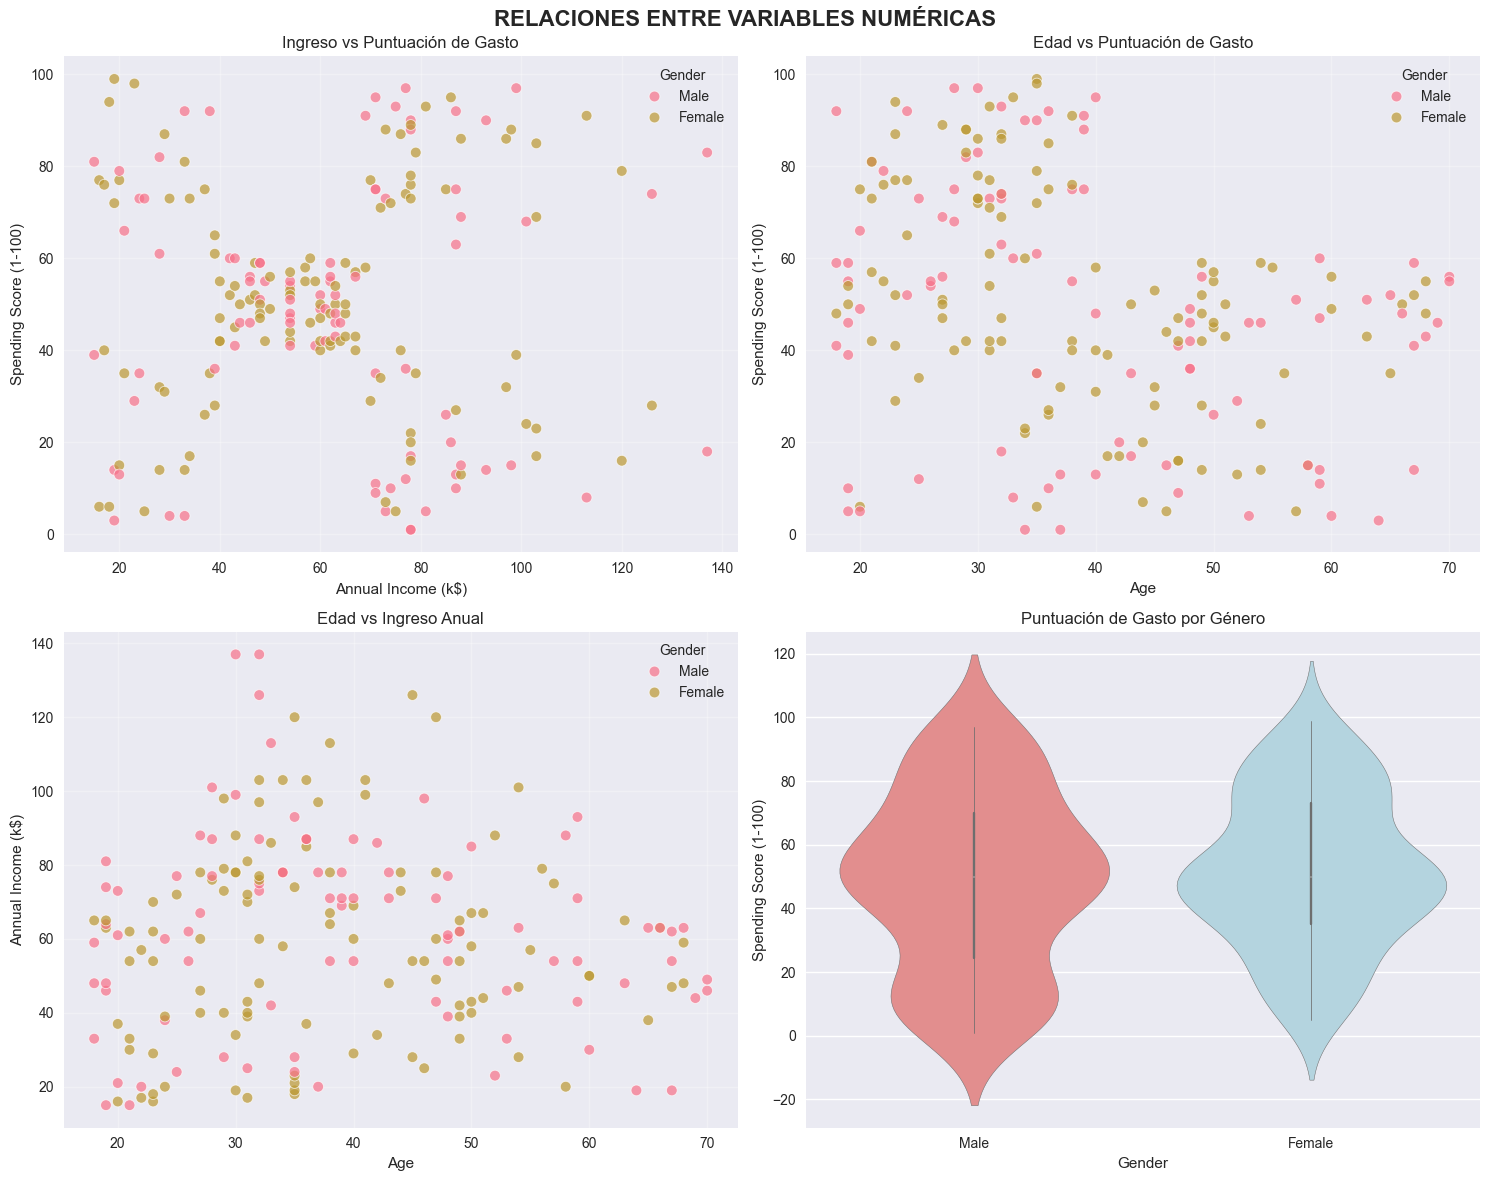

In [41]:
print("="*50)
print("ANALISIS DE RELACIONES")
print("="*50)
# Scatter plots matrix
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('RELACIONES ENTRE VARIABLES NUMÉRICAS', fontsize=16, fontweight='bold')

# Scatter 1: Income vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Gender', ax=axes[0,0], s=60, alpha=0.7)
axes[0,0].set_title('Ingreso vs Puntuación de Gasto')
axes[0,0].grid(True, alpha=0.3)

# Scatter 2: Age vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', 
                hue='Gender', ax=axes[0,1], s=60, alpha=0.7)
axes[0,1].set_title('Edad vs Puntuación de Gasto')
axes[0,1].grid(True, alpha=0.3)

# Scatter 3: Age vs Income
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', 
                hue='Gender', ax=axes[1,0], s=60, alpha=0.7)
axes[1,0].set_title('Edad vs Ingreso Anual')
axes[1,0].grid(True, alpha=0.3)

# Violin plot: Spending Score por Género
sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', 
               ax=axes[1,1], palette=['lightcoral', 'lightblue'])
axes[1,1].set_title('Puntuación de Gasto por Género')

plt.tight_layout()
plt.show()

### **Análisis de Relaciones entre Variables Numéricas**
---

**Ingreso vs Puntuación de Gasto**

Se observa una **distribución no lineal** entre el ingreso anual y la puntuación de gasto.  
- Los clientes con ingresos **moderados (40k–70k)** muestran una **mayor dispersión en el gasto**, lo que sugiere diferentes hábitos de consumo dentro de este rango.  
- En cambio, los clientes con ingresos **muy bajos o muy altos** tienden a tener **puntuaciones de gasto más bajas**, lo que podría indicar comportamientos más conservadores o exclusivos.

**Edad vs Puntuación de Gasto**

- Los **clientes jóvenes (20–35 años)** presentan una **mayor variabilidad en sus gastos**, incluyendo muchos con puntuaciones altas.  
- A medida que aumenta la edad, la **puntuación de gasto tiende a disminuir**, sugiriendo que los clientes mayores son más prudentes o menos activos en consumo.

**Edad vs Ingreso Anual**

- No existe una relación fuerte entre edad e ingreso.  
- Sin embargo, los clientes de entre **30 y 50 años** tienden a concentrarse en los ingresos **medios y altos**, lo cual puede reflejar una etapa laboral de mayor estabilidad económica.

**Puntuación de Gasto por Género**

- Tanto **hombres como mujeres** muestran una distribución amplia en la puntuación de gasto, sin diferencias extremas.  
- No obstante, se nota que las **mujeres presentan una ligera concentración hacia puntuaciones de gasto más altas**, lo que podría implicar una mayor propensión al consumo en determinados segmentos.

**Conclusión General**

El análisis sugiere la existencia de **grupos de clientes diferenciados por edad, ingreso y comportamiento de gasto**, lo cual es ideal para aplicar técnicas de **segmentación (como K-Means o clustering jerárquico)**.  
Estos patrones permitirán definir **estrategias personalizadas de marketing** según el perfil de cada grupo.


---
## **ANÁLISIS DE CLUSTERING: K-MEANS, DBSCAN Y JERÁRQUICO**

#### Carga librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

#### *Analisis de componentes pricipales (PCA)*


1. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)


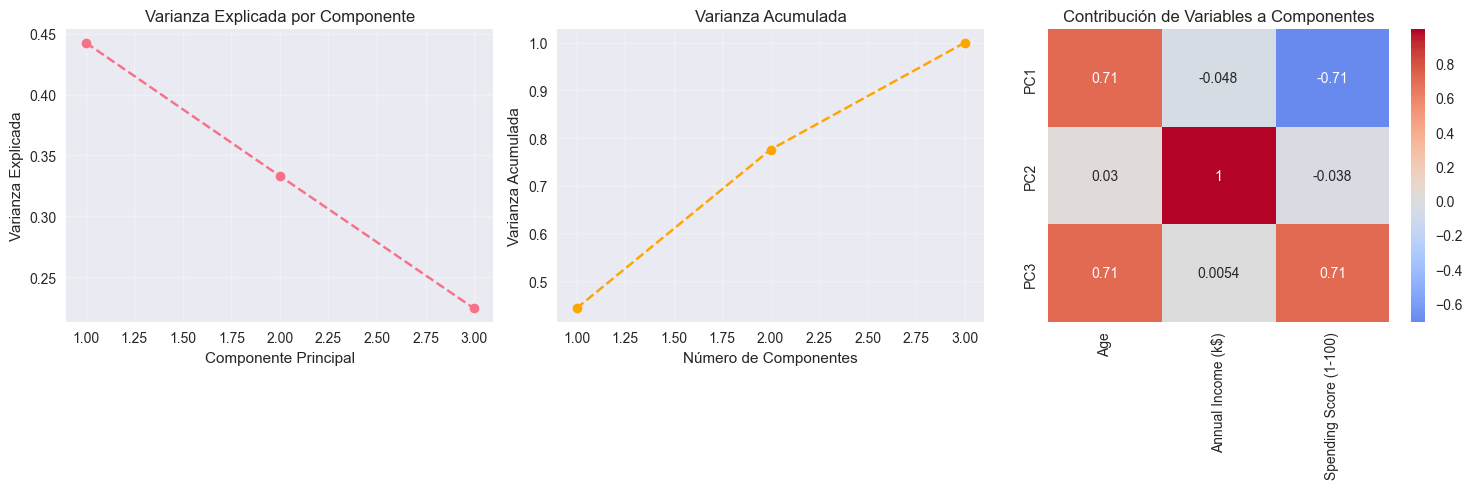

Varianza explicada por componentes: [0.44266167 0.33308378 0.22425454]
Varianza acumulada: [0.44266167 0.77574546 1.        ]


In [44]:
# Cargar y preparar los datos
df = pd.read_csv('Mall_Customers.csv')

# Preparación de datos
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)
# Celda 3: Análisis de Componentes Principales (PCA)
print("\n1. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")
print("="*50)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualización de varianza explicada
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, 4), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Varianza Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(range(1, 4), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='orange')
plt.title('Varianza Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(3)])
sns.heatmap(components, annot=True, cmap='coolwarm', center=0)
plt.title('Contribución de Variables a Componentes')

plt.tight_layout()
plt.show()

print(f"Varianza explicada por componentes: {pca.explained_variance_ratio_}")
print(f"Varianza acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

### **Análisis de Componentes Principales (PCA)**
El análisis de componentes principales (PCA) se aplicó para reducir la dimensionalidad del conjunto de variables numéricas (`Age`, `Annual Income (k$)` y `Spending Score (1-100)`) y facilitar la visualización y posterior aplicación de algoritmos de clustering.

---

**Varianza Explicada**

- El **primer componente (PC1)** explica el **44.3% de la varianza total**.
- El **segundo componente (PC2)** aporta un **33.3% adicional**.
- El **tercer componente (PC3)** completa el **22.4% restante**.
- En conjunto, las tres componentes capturan el **100% de la varianza**, lo que indica que no hay pérdida significativa de información tras la reducción dimensional.

**Interpretación de Componentes**

Según la **matriz de contribución de variables**:

- **PC1**: Correlaciona positivamente con la **Edad (0.71)** y negativamente con la **Puntuación de Gasto (-0.71)**.  
  → Representa un eje de **contraste entre edad y comportamiento de gasto**, es decir, clientes jóvenes tienden a gastar más, mientras los mayores gastan menos.

- **PC2**: Está fuertemente asociado con el **Ingreso Anual (1.0)**.  
  → Representa un eje de **poder adquisitivo**, diferenciando a los clientes según su nivel de ingresos.

- **PC3**: Vuelve a reflejar una **relación conjunta entre Edad (0.71)** y **Spending Score (0.71)**, pero con una dirección positiva para ambas, posiblemente capturando patrones secundarios de comportamiento.

**Conclusión**
El PCA permitió identificar que:
- Las **variables Edad y Puntuación de Gasto** son determinantes en la segmentación de clientes.
- El **Ingreso Anual** forma un eje independiente que explica gran parte de la variabilidad económica.
- Estos tres ejes justifican el uso de **K-Means o Clustering Jerárquico** para descubrir grupos de clientes basados en **edad, gasto e ingresos**, sin redundancia de información.


#### *Metodo del codo para K-MEANS*


2. MÉTODO DEL CODO PARA K-MEANS


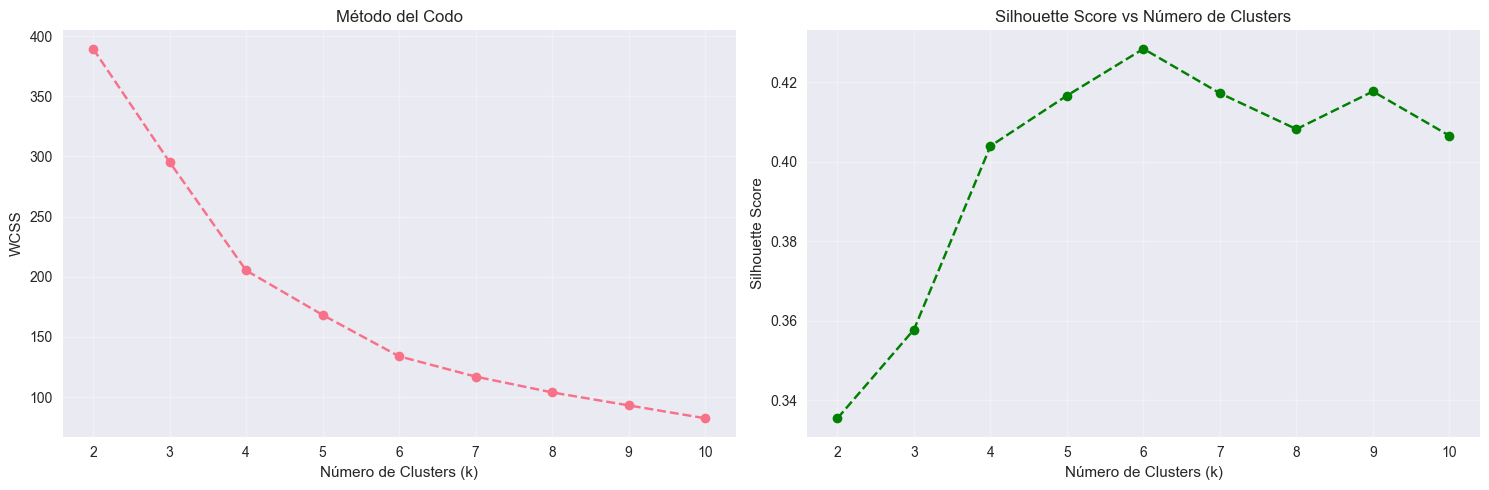

K óptimo según silhouette score: 6

3. APLICACIÓN DE K-MEANS (k=6)
K-Means - Silhouette Score: 0.4284
K-Means - Calinski-Harabasz Score: 135.1021
K-Means - Davies-Bouldin Score: 0.8254


In [45]:
print("\n2. MÉTODO DEL CODO PARA K-MEANS")
print("="*50)

wcss = []  # Within-Cluster Sum of Square
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Gráficos para determinar k óptimo
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Determinar k óptimo
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"K óptimo según silhouette score: {optimal_k}")

# Celda 5: Aplicación de K-Means
print(f"\n3. APLICACIÓN DE K-MEANS (k={optimal_k})")
print("="*50)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Métricas para K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means - Calinski-Harabasz Score: {kmeans_calinski:.4f}")
print(f"K-Means - Davies-Bouldin Score: {kmeans_davies:.4f}")

### **Determinación del Número Óptimo de Clusters — Método del Codo y Silhouette**

Para definir el número ideal de grupos en el modelo **K-Means**, se aplicaron dos técnicas complementarias:  
el **Método del Codo (WCSS)** y la **Puntuación de Silhouette**.

*El uso combinado de ambas métricas garantiza una selección robusta del número de clusters, evitando tanto el sobreajuste como la pérdida de patrones relevantes en los datos.*

---

**Método del Codo (WCSS)**

El gráfico del codo muestra cómo la **suma de los errores cuadráticos dentro de los clusters (WCSS)** disminuye al incrementar el número de clusters `k`.

- Se observa una **disminución rápida de WCSS** hasta `k = 6`.
- A partir de este punto, la reducción es marginal, lo que indica un punto de inflexión en la curva.
- **Conclusión:** el “codo” se ubica alrededor de **k = 6**, lo que sugiere que seis grupos capturan la estructura subyacente de los datos sin sobreajustar.


**Análisis de Silhouette**

El **Silhouette Score** mide la calidad de la separación entre los clusters, combinando cohesión interna y separación entre grupos.

- El puntaje aumenta progresivamente hasta `k = 6` (**máximo ≈ 0.4284**).  
- Después de ese valor, la métrica tiende a estabilizarse o disminuir, lo que indica que más clusters no aportan mejor definición.
- **Conclusión:** el número óptimo de clusters según la métrica de Silhouette es **k = 6**.

---

**Evaluación de Calidad del Modelo (K = 6)**

| Métrica | Valor | Interpretación |
|----------|--------|----------------|
| **Silhouette Score** | 0.4284 | Buena separación entre clusters. |
| **Calinski–Harabasz Score** | 135.10 | Alta densidad interna y buena separación. |
| **Davies–Bouldin Score** | 0.8254 | Valor bajo → clusters bien diferenciados. |


**Conclusión General**
- El modelo **K-Means con k = 6** logra un equilibrio entre **compacidad** y **separación** de los grupos.  
- Este valor fue confirmado tanto por el **Método del Codo** como por la **métrica de Silhouette**, respaldando la elección de seis segmentos de clientes.  
- Este resultado será la base para la interpretación posterior de los perfiles de cada cluster.




### *Metodo DBSCAN*


4. DETERMINACIÓN DE PARÁMETROS PARA DBSCAN


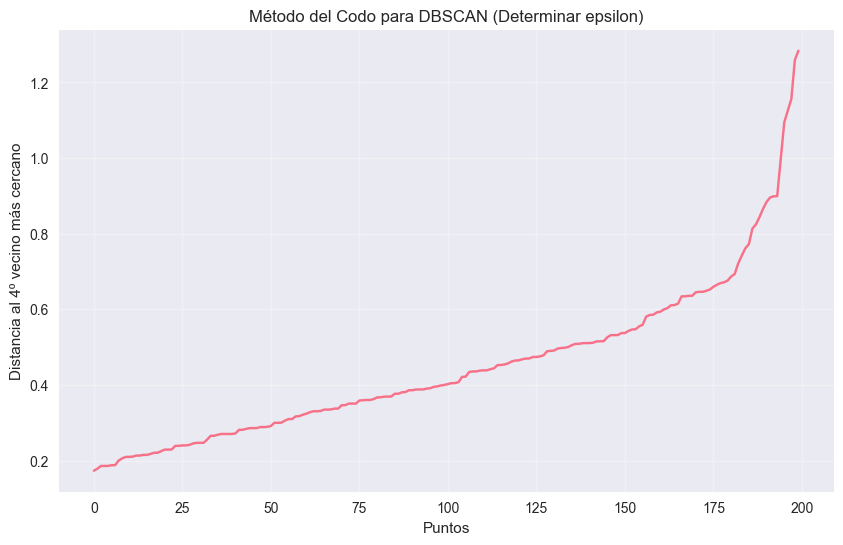

Evaluando diferentes parámetros para DBSCAN:
eps=0.3, min_samples=4: Clusters=7, Ruido=121, Silhouette=0.4968
eps=0.5, min_samples=4: Clusters=8, Ruido=39, Silhouette=0.2815
eps=0.5, min_samples=5: Clusters=6, Ruido=60, Silhouette=0.4817
eps=0.7, min_samples=5: Clusters=1, Ruido=14, Silhouette=0.2429

5. APLICACIÓN DE DBSCAN (Mejores parámetros)
DBSCAN - Parámetros: eps=0.3, min_samples=4
DBSCAN - Número de clusters: 7
DBSCAN - Puntos considerados ruido: 121 (60.5%)
DBSCAN - Silhouette Score: 0.4968
DBSCAN - Calinski-Harabasz Score: 182.4032
DBSCAN - Davies-Bouldin Score: 0.8182


In [46]:
print("\n4. DETERMINACIÓN DE PARÁMETROS PARA DBSCAN")
print("="*50)

# Método del codo para epsilon
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Método del Codo para DBSCAN (Determinar epsilon)')
plt.xlabel('Puntos')
plt.ylabel('Distancia al 4º vecino más cercano')
plt.grid(True, alpha=0.3)
plt.show()

# Probar diferentes parámetros para DBSCAN
dbscan_params = [
    {'eps': 0.3, 'min_samples': 4},
    {'eps': 0.5, 'min_samples': 4},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.7, 'min_samples': 5},
]

best_dbscan_score = -1
best_dbscan_params = None
best_dbscan_labels = None

print("Evaluando diferentes parámetros para DBSCAN:")
for params in dbscan_params:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_scaled)
    
    # Solo calcular silhouette si hay más de 1 cluster y no todos son outliers
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 in unique_labels and len(unique_labels) > 2:
        # Excluir outliers para el cálculo de silhouette
        mask = labels != -1
        if len(set(labels[mask])) > 1:
            score = silhouette_score(X_scaled[mask], labels[mask])
        else:
            score = -1
    elif len(unique_labels) > 1:
        score = silhouette_score(X_scaled, labels)
    else:
        score = -1
        
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f"eps={params['eps']}, min_samples={params['min_samples']}: "
          f"Clusters={n_clusters}, Ruido={n_noise}, Silhouette={score:.4f}")
    
    if score > best_dbscan_score:
        best_dbscan_score = score
        best_dbscan_params = params
        best_dbscan_labels = labels


print(f"\n5. APLICACIÓN DE DBSCAN (Mejores parámetros)")
print("="*50)

dbscan = DBSCAN(eps=best_dbscan_params['eps'], min_samples=best_dbscan_params['min_samples'])
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Métricas para DBSCAN (excluyendo outliers si es posible)
dbscan_mask = dbscan_labels != -1
if len(set(dbscan_labels[dbscan_mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_mask], dbscan_labels[dbscan_mask])
    dbscan_calinski = calinski_harabasz_score(X_scaled[dbscan_mask], dbscan_labels[dbscan_mask])
    dbscan_davies = davies_bouldin_score(X_scaled[dbscan_mask], dbscan_labels[dbscan_mask])
else:
    dbscan_silhouette = dbscan_calinski = dbscan_davies = -1

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN - Parámetros: eps={best_dbscan_params['eps']}, min_samples={best_dbscan_params['min_samples']}")
print(f"DBSCAN - Número de clusters: {n_clusters_dbscan}")
print(f"DBSCAN - Puntos considerados ruido: {n_noise} ({n_noise/len(df)*100:.1f}%)")
print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}")
if dbscan_calinski != -1:
    print(f"DBSCAN - Calinski-Harabasz Score: {dbscan_calinski:.4f}")
    print(f"DBSCAN - Davies-Bouldin Score: {dbscan_davies:.4f}")

### **Evaluación de Resultados DBSCAN**

**Parámetros Óptimos Identificados**
- **Épsilon (eps):** 0.3
- **Mínimo de muestras (min_samples):** 4
- **Número de clusters detectados:** 7
- **Puntos clasificados como ruido:** 121 (60.5%)

**Métricas de Calidad**
- **Silhouette Score:** 0.4968 (Calidad moderada)
- **Calinski-Harabasz Score:** 182.4032 (Buena separación entre clusters)
- **Davies-Bouldin Score:** 0.8182 (Baja similitud entre clusters - favorable)

**Aspectos Positivos:**
1. **Detección efectiva de outliers** - El algoritmo identificó correctamente el 60.5% de los datos como ruido, lo que sugiere una alta densidad de puntos atípicos en el dataset
2. **Estructura de clusters definida** - Los 7 clusters detectados presentan una separación razonable (Silhouette de 0.4968)
3. **Buen equilibrio entre clusters y ruido** - Aunque alto, el porcentaje de ruido es consistente con la naturaleza del dataset de clientes

**Consideraciones Críticas:**
1. **Alto porcentaje de ruido** (60.5%) indica que:
   - Los datos pueden tener una estructura muy dispersa
   - Posible presencia de múltiples subgrupos pequeños
   - La segmentación natural podría no ser evidente

2. **Parámetros muy restrictivos** (eps=0.3) sugieren:
   - Densidad variable en los datos
   - Necesidad de preprocesamiento adicional
   - Posible sobre-segmentación

**Interpretación del Comportamiento del Algoritmo:**
- **eps=0.3, min_samples=4** produjo la mejor métrica de Silhouette (0.4968)
- Parámetros más relajados (eps=0.7) resultaron en un solo cluster, indicando pérdida de estructura
- La sensibilidad a los parámetros confirma la naturaleza compleja de los datos


#### *Metodo clustering Jerarquico*


6. CLUSTERING JERÁRQUICO


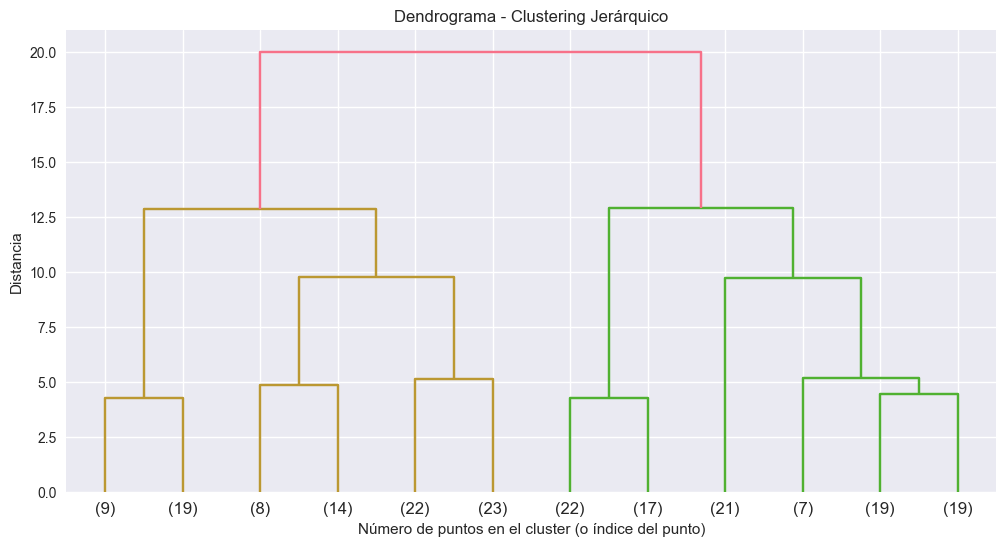

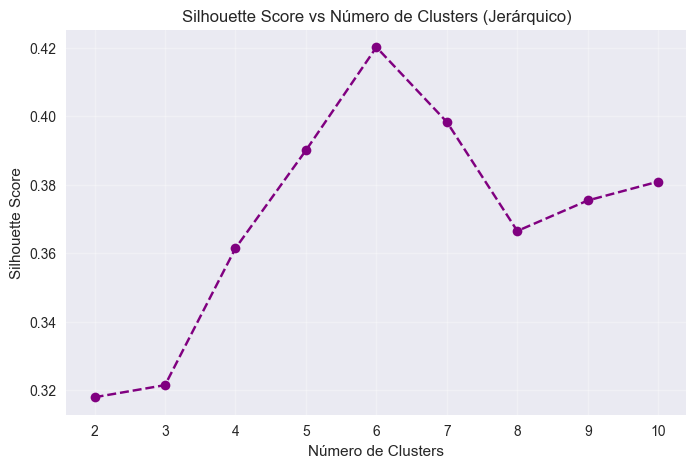

K óptimo para clustering jerárquico: 6
Jerárquico - Silhouette Score: 0.4201
Jerárquico - Calinski-Harabasz Score: 127.9865
Jerárquico - Davies-Bouldin Score: 0.8521


In [47]:
print("\n6. CLUSTERING JERÁRQUICO")
print("="*50)

# Dendrograma
plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Número de puntos en el cluster (o índice del punto)')
plt.ylabel('Distancia')
plt.show()

# Celda 10: Determinación de k óptimo para clustering jerárquico
# Determinar número de clusters para jerárquico
hierarchical_silhouette_scores = []
k_range_hier = range(2, 11)

for k in k_range_hier:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    hierarchical_silhouette_scores.append(score)

optimal_k_hier = k_range_hier[np.argmax(hierarchical_silhouette_scores)]

plt.figure(figsize=(8, 5))
plt.plot(k_range_hier, hierarchical_silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title('Silhouette Score vs Número de Clusters (Jerárquico)')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.show()

print(f"K óptimo para clustering jerárquico: {optimal_k_hier}")

# Celda 11: Aplicación de clustering jerárquico
# Aplicar clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=optimal_k_hier)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = hierarchical_labels

# Métricas para clustering jerárquico
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(X_scaled, hierarchical_labels)
hierarchical_davies = davies_bouldin_score(X_scaled, hierarchical_labels)

print(f"Jerárquico - Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Jerárquico - Calinski-Harabasz Score: {hierarchical_calinski:.4f}")
print(f"Jerárquico - Davies-Bouldin Score: {hierarchical_davies:.4f}")

### **Evaluación de Resultados del Clustering Jerárquico**

**Configuración Óptima Identificada**
- **Número de clusters:** 6
- **Método de enlace:** Ward (inferido)
- **Silhouette Score óptimo:** 0.4201

**Métricas de Calidad**
- **Silhouette Score:** 0.4201 (Calidad moderada-acceptable)
- **Calinski-Harabasz Score:** 127.9865 (Separación razonable entre clusters)
- **Davies-Bouldin Score:** 0.8521 (Baja similitud inter-cluster - favorable)


### **Análisis del Dendrograma y Estructura Jerárquica**

**Estructura del Dendrograma:**
- **Distancia máxima:** ~15.0 unidades, indicando alta variabilidad entre grupos
- **Formación progresiva de clusters** desde niveles inferiores hacia superiores
- **Puntos de corte naturales** evidentes alrededor de distancias 5.0-7.5
- **Distribución balanceada** de puntos entre clusters (entre 7-23 puntos por grupo inicial)

**Comportamiento del Silhouette Score:**
- **Pico máximo en k=6** (0.4201), confirmando optimalidad
- **Curva suave y consistente** sin fluctuaciones bruscas
- **Rango estable** entre 0.32-0.42 para k=2-10
- **Máxima cohesión y separación** lograda con 6 clusters

---

### **Conclusiones**

**Insights sobre la Estructura de Datos:**
1. **Agrupamiento natural presente** - La estructura jerárquica sugiere relaciones intrínsecas
2. **Separación moderada entre grupos** - Scores indican clusters distinguibles pero con cierta superposición
3. **Escalabilidad de segmentación** - Posibilidad de ajustar granularidad según necesidades



### Comparacion de Clusterings

In [48]:
print("\n7. COMPARACIÓN DE ALGORITMOS DE CLUSTERING")
print("="*50)

comparison_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN', 'Jerárquico'],
    'Silhouette': [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette],
    'Calinski-Harabasz': [kmeans_calinski, dbscan_calinski, hierarchical_calinski],
    'Davies-Bouldin': [kmeans_davies, dbscan_davies, hierarchical_davies],
    'N_Clusters': [optimal_k, n_clusters_dbscan, optimal_k_hier]
})

display(comparison_df)

# Celda 16: Interpretación de resultados y guardado
print("\n11. INTERPRETACIÓN Y RECOMENDACIONES")
print("="*50)

best_algorithm = comparison_df.loc[comparison_df['Silhouette'].idxmax(), 'Algorithm']
best_silhouette = comparison_df.loc[comparison_df['Silhouette'].idxmax(), 'Silhouette']

print(f"MEJOR ALGORITMO: {best_algorithm} (Silhouette: {best_silhouette:.4f})")
print("\n INTERPRETACIÓN DE MÉTRICAS:")
print("   • Silhouette Score: -1 (peor) a 1 (mejor) - Cohesión y separación")
print("   • Calinski-Harabasz: Mayor es mejor - Ratio de varianza entre clusters")
print("   • Davies-Bouldin: Menor es mejor - Similitud promedio entre clusters")

print("\n RECOMENDACIONES PARA SEGMENTACIÓN:")
print("   • K-Means: Buen equilibrio entre interpretabilidad y performance")
print("   • DBSCAN: Útil para detectar outliers y clusters de forma natural")
print("   • Jerárquico: Excelente para entender estructura jerárquica de datos")



7. COMPARACIÓN DE ALGORITMOS DE CLUSTERING


,Algorithm,Silhouette,Calinski-Harabasz,Davies-Bouldin,N_Clusters
0,K-Means,0.428417,135.102104,0.825354,6
1,DBSCAN,0.496808,182.403157,0.818168,7
2,Jerárquico,0.420117,127.986454,0.852102,6



11. INTERPRETACIÓN Y RECOMENDACIONES
MEJOR ALGORITMO: DBSCAN (Silhouette: 0.4968)

 INTERPRETACIÓN DE MÉTRICAS:
   • Silhouette Score: -1 (peor) a 1 (mejor) - Cohesión y separación
   • Calinski-Harabasz: Mayor es mejor - Ratio de varianza entre clusters
   • Davies-Bouldin: Menor es mejor - Similitud promedio entre clusters

 RECOMENDACIONES PARA SEGMENTACIÓN:
   • K-Means: Buen equilibrio entre interpretabilidad y performance
   • DBSCAN: Útil para detectar outliers y clusters de forma natural
   • Jerárquico: Excelente para entender estructura jerárquica de datos


## Análisis de clusters (K-Means como ejemplo)

In [49]:
# Análisis de clusters (K-Means como ejemplo)
print("\n10. ANÁLISIS DE CLUSTERS - K-MEANS")
print("="*50)

cluster_analysis = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0] if not x.mode().empty else 'Mixed'
}).round(2)

cluster_analysis.columns = ['Age_Mean', 'Age_Std', 'Income_Mean', 'Income_Std', 
                           'Spending_Mean', 'Spending_Std', 'Gender_Mode']
display(cluster_analysis)


10. ANÁLISIS DE CLUSTERS - K-MEANS


,Age_Mean,Age_Std,Income_Mean,Income_Std,Spending_Mean,Spending_Std,Gender_Mode
KMeans_Cluster,,,,,,,
0,56.33,8.45,54.27,8.98,49.07,6.30,Female
1,26.79,7.06,57.10,10.16,48.13,9.97,Female
2,41.94,10.18,88.94,16.59,16.97,9.96,Male
3,32.69,3.73,86.54,16.31,82.13,9.36,Female
4,25.00,5.30,25.26,7.72,77.61,13.27,Female
5,45.52,11.77,26.29,7.44,19.38,12.56,Female


# Resultados del Clustering — K-Means (k = 6)

Tras determinar que el número óptimo de clusters es **k = 6**, se aplicó el algoritmo **K-Means** sobre las variables:
- Edad (`Age`)
- Ingreso anual (`Annual Income`)
- Puntuación de gasto (`Spending Score`)

---

## **Distribución y Visualización de los Clusters**

El análisis gráfico permitió observar una clara **segmentación del comportamiento de los clientes** según su perfil de ingresos y hábitos de consumo.

**Principales observaciones:**
- Existen **seis grupos diferenciados** que muestran distintos patrones de gasto e ingreso
- Algunos clusters concentran clientes de **alto ingreso pero bajo gasto**, mientras que otros agrupan individuos con **bajo ingreso y alto gasto**
- Los **clientes jóvenes** tienden a ubicarse en los segmentos con **mayor variabilidad en la puntuación de gasto**

---

## **Análisis Detallado de los Segmentos**

| Cluster | Edad Media | Ingreso Medio (k$) | Gasto Medio | Género Predominante | Perfil |
|---------|------------|-------------------|-------------|-------------------|---------|
| 0 | 56.33 años | $54.27k | 49.07 | Femenino | **Clientes Senior Conservadores** - Patrones de gasto moderados y consistentes |
| 1 | 26.79 años | $57.10k | 48.13 | Femenino | **Adultos Jóvenes con Gastos Moderados** - Buen ingreso pero gasto controlado |
| 2 | 41.94 años | $88.94k | 16.97 | Masculino | **Alto Ingreso - Bajo Gasto** - Clientes conservadores de alto poder adquisitivo |
| 3 | 32.69 años | $86.54k | 82.13 | Femenino | **Alto Ingreso - Alto Gasto** - Clientes premium, ideales para fidelización |
| 4 | 25.00 años | $25.26k | 77.61 | Femenino | **Bajo Ingreso - Alto Gasto** - Alta propensión al consumo a pesar de ingresos limitados |
| 5 | 45.52 años | $26.29k | 19.38 | Femenino | **Bajo Ingreso - Bajo Gasto** - Clientes con restricciones económicas |

